# Control the style of your figures with matplotlib
**6.11.2022 - eScience Course - Theodore Khadir**
- Defining the figure and subplots
- Merging subplots using gridspec
- Controling the style of the axes
- Controling the position of the colorbar
- Practice on a more complex figure
- Cartopy (<font color='red'>coming soon!</font>)

In [2]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Figure and axes
- Define a figure first
    - You can choose the size of the figure
    - A matpltolib figure is composed of *subplots* or *axes*
- You need to define the grid of axes composing your figure
    - **fig = plt.figure(figsize=(width, height))**
    - **ax = plt.subplot(n_rows, n_cols, index_ax)**

In [13]:
# function that you apply to an ax to mask the ticks (forget about this for now)
def hide_ticks(ax):
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1)

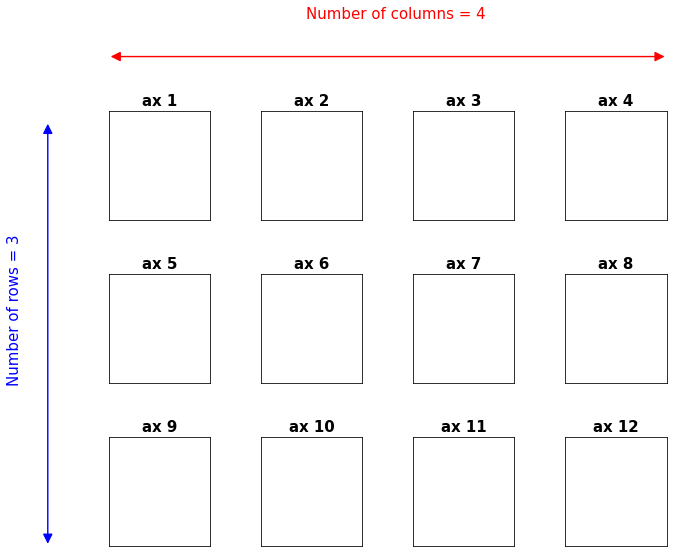

In [66]:
# define a figure and choose the size
fig = plt.figure(figsize=(10, 8))

# create the grid using plt.subplots
# nrows = 3, ncols = 4
for n_ax in range(0, 12):
    ax = plt.subplot(3, 4, n_ax + 1)
    ax.set_title('ax ' + str(n_ax + 1), fontweight='bold', fontsize=15)
    hide_ticks(ax)
    
    # adding the arrows
    if n_ax == 0:
        ax.annotate("", xy=(-0.6, -3), xycoords='axes fraction', xytext=(-0.6, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<|-|>", color='blue', linewidth=1.4, mutation_scale=20))
        # add text on the left of the arrow
        ax.text(-1, -1.5, 'Number of rows = 3', fontsize=15, color='blue', transform=ax.transAxes, rotation=90)
        
        ax.annotate("", xy=(0, 1.5), xycoords='axes fraction', xytext=(5.5, 1.5), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<|-|>", color='red', linewidth=1.4, mutation_scale=20))
        # add text on the left of the arrow
        ax.text(1.95, 1.85, 'Number of columns = 4', fontsize=15, color='red', transform=ax.transAxes)        
        

# adjust the spacing between subplots: wspace for width and hspace for height
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# Using different sizes of subplots in one figure

## With plt.subplots(n_rows, n_cols, N)

Text(0.25, 1.3, 'how to expand subplot(2, 2, 4) to this area?\n -> Need to use gridspec')

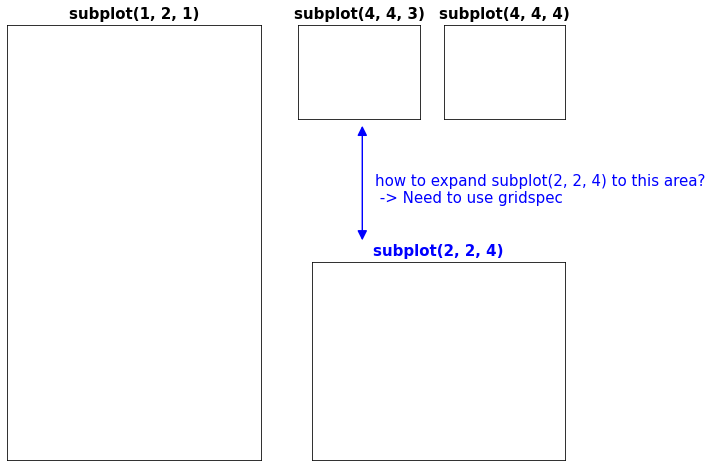

In [76]:
fig = plt.figure(figsize=(10, 8))

for n_ax in range(2, 4):
    ax = plt.subplot(4, 4, n_ax + 1)
    ax.set_title('subplot(4, 4, ' + str(n_ax + 1) + ')', fontweight='bold', fontsize=15)
    hide_ticks(ax)
    
ax = plt.subplot(1, 2, 1)
ax.set_title('subplot(1, 2, 1)', fontweight='bold', fontsize=15)
hide_ticks(ax)

ax = plt.subplot(2, 2, 4)
ax.set_title('subplot(2, 2, 4)', fontweight='bold', fontsize=15, color='blue')
hide_ticks(ax)
ax.annotate("", xy=(0.2, 1.1), xycoords='axes fraction', xytext=(0.2, 1.7), textcoords='axes fraction',
    arrowprops=dict(arrowstyle="<|-|>", color='blue', linewidth=1.4, mutation_scale=20))
# add text on the left of the arrow
ax.text(0.25, 1.3, 'how to expand subplot(2, 2, 4) to this area?\n -> Need to use gridspec', fontsize=15, color='blue', transform=ax.transAxes) 

## With gridspec
- It is used to merge subplots of a pre-defined grid
- You can control easily the spacing between the subplots
- **gs = gridspec.GridSpec(ncols=ncols, nrows=nrows, hspace = 0.0, wspace = 0, top = 1,
                       bottom = 0, left = 0, right = 1)**
    - hspace (height between subplots)
    - wspace (width between subplots)
    - top: from 0 to 1, 1 is the top of the figure
    - bottom: from 0 to 1, 0 is the bottom of the figure
    - ...
        

Text(0.5, 0.5, 'gs[1:4, 2:4]')

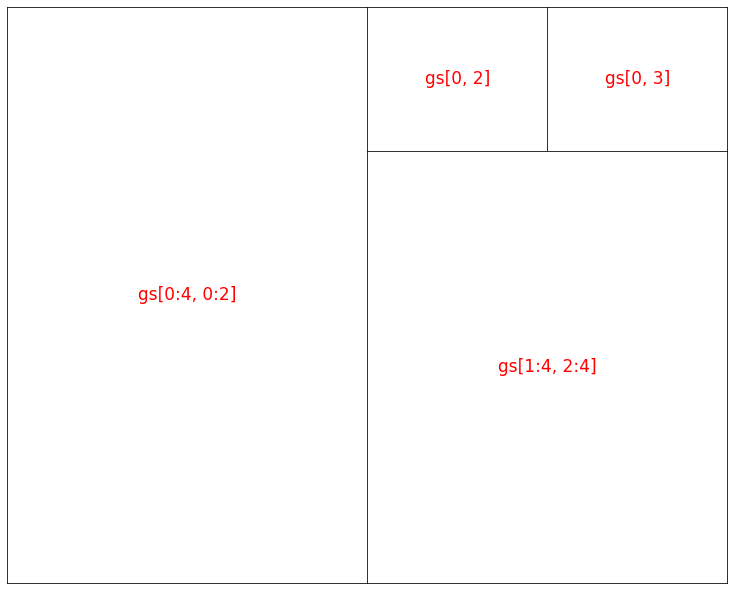

In [89]:
# define a figure and choose the size
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(ncols=4, nrows=4, hspace = 0.0, wspace = 0, top = 1,
                       bottom = 0, left = 0, right = 1)

# create an ax with gs
ax = fig.add_subplot(gs[0:4, 0:2])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[0:4, 0:2]', fontsize=17, color='red', transform=ax.transAxes, 
        horizontalalignment='center', verticalalignment='center')

ax = fig.add_subplot(gs[0, 2])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[0, 2]', fontsize=17, color='red', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')
ax = fig.add_subplot(gs[0, 3])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[0, 3]', fontsize=17, color='red', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')

ax = fig.add_subplot(gs[1:4, 2:4])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[1:4, 2:4]', fontsize=17, color='red', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')

Now with some space added between subplots

Text(0.5, 0.5, 'gs[1:4, 2:4]')

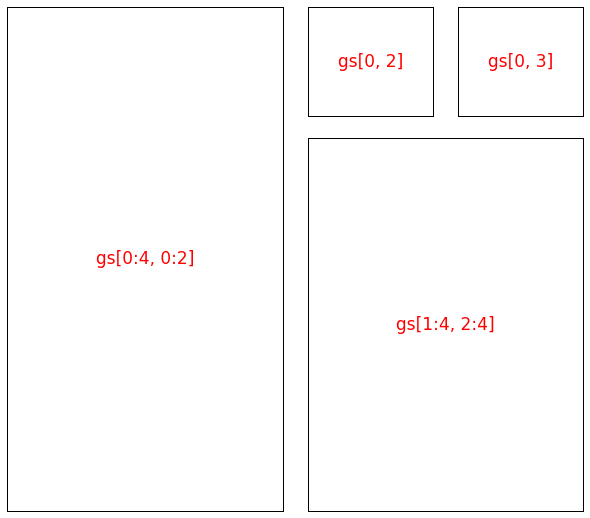

In [217]:
# define a figure and choose the size
fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(ncols=4, nrows=4, hspace = 0.2, wspace = 0.2, top = 1,
                       bottom = 0, left = 0, right = 1)

# create an ax with gs
ax = fig.add_subplot(gs[0:4, 0:2])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[0:4, 0:2]', fontsize=17, color='red', transform=ax.transAxes, 
        horizontalalignment='center', verticalalignment='center')

ax = fig.add_subplot(gs[0, 2])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[0, 2]', fontsize=17, color='red', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')
ax = fig.add_subplot(gs[0, 3])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[0, 3]', fontsize=17, color='red', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')

ax = fig.add_subplot(gs[1:4, 2:4])
hide_ticks(ax)
ax.text(0.5, 0.5, 'gs[1:4, 2:4]', fontsize=17, color='red', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')

# Write a function to control the style of the ax

In [107]:
def fancy(ax):
    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
        
    # set the fontsize for all your ticks
    fontsize = 20
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)
    
    # mask top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

Text(0.08, 0.8, '- Thicker spines and ticks\n- Larger tick labels')

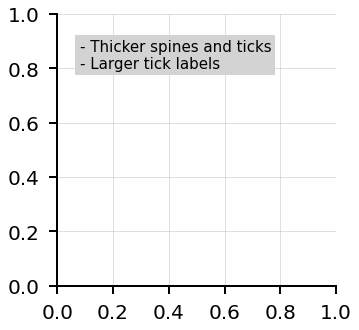

In [117]:
# create fig and subplot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fancy(ax)

ax.text(0.08, 0.8, '- Thicker spines and ticks\n- Larger tick labels', 
        fontsize=15, bbox=dict(facecolor='lightgrey', alpha=1, linewidth=0.0))

# Control the position and properties of a colorbar
- Using different method to define the position of the colorbar
    - gridspec
    - inset_axes
    - add_axes
- Be careful when selecting your colorbar (colorblind friendly and sequential)
    - https://journals.ametsoc.org/view/journals/bams/96/2/bams-d-13-00155.1.xml

In [4]:
# function that applies to ax to mask the ticks
def style(ax):
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')

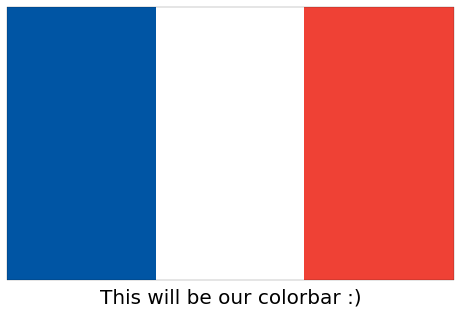

In [172]:
# crate a color map
def build_cmap(name, colors, N=100, reverse=''):
    '''
    Build a custom colormap from a list of colors
    The colors are linearly interpolated
    The number of colors in the final colormap is N
    You can reverse the colormap by setting reverse='r'
    ''' 
    if reverse == 'r':
        colors = [colors[len(colors)-1-i] for i in range(0, len(colors))]
        cmap = LinearSegmentedColormap.from_list(name, colors, N=N)
    else:
        cmap = LinearSegmentedColormap.from_list(name, colors, N=N)
    return cmap

blue = (0/255, 85/255, 164/255)
white = (255/255, 255/255, 255/255)
red = (239/255, 65/255, 53/255)
cmap_cocorico = build_cmap('cocorico', 
        [blue, white, red], N=3)
cmap_cocorico2 = build_cmap('cocorico2', 
        [blue, white, red], N=15)

fig, ax = plt.subplots(figsize=(8, 10))
fig.subplots_adjust(bottom=0.5)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap_cocorico,
                                orientation='horizontal')

# title
cb1.set_label('This will be our colorbar :)', fontsize=20)
style(ax)

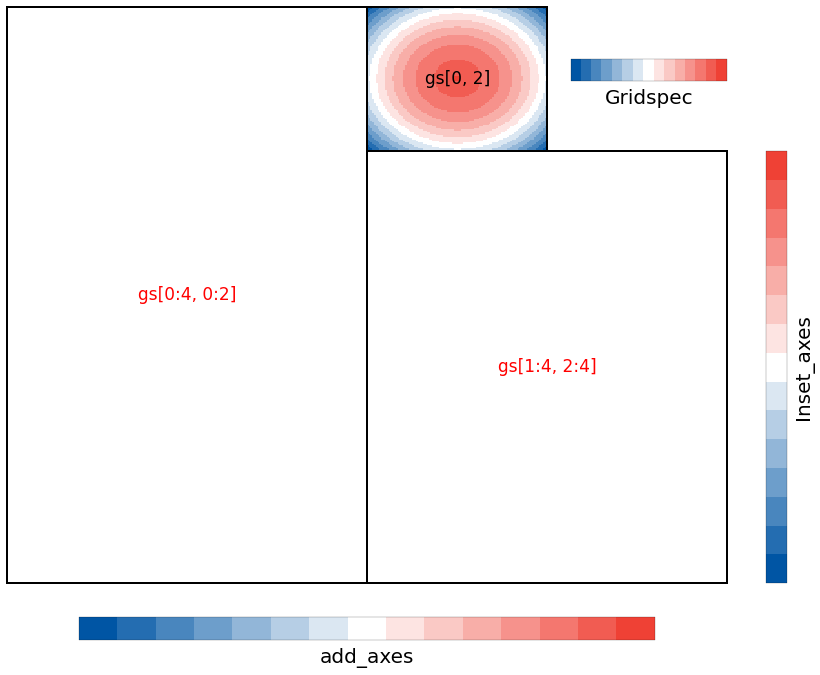

In [170]:
# define a figure and choose the size
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(ncols=4, nrows=4, hspace = 0.0, wspace = 0, top = 1,
                       bottom = 0, left = 0, right = 1)

# create an ax with gs
ax = fig.add_subplot(gs[0:4, 0:2])
style(ax)
ax.text(0.5, 0.5, 'gs[0:4, 0:2]', fontsize=17, color='red', transform=ax.transAxes, 
        horizontalalignment='center', verticalalignment='center')

########## create a plot data ##########
ax = fig.add_subplot(gs[0, 2])
style(ax)
ax.text(0.5, 0.5, 'gs[0, 2]', fontsize=17, color='k', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center')
N = 100
X, Y = np.mgrid[-4:4:complex(0, N), -4:4:complex(0, N)]
Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2
c = ax.pcolor(X, Y, Z,norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap_cocorico2)
#######################################

ax_bis = fig.add_subplot(gs[1:4, 2:4])
style(ax_bis)
ax_bis.text(0.5, 0.5, 'gs[1:4, 2:4]', fontsize=17, color='red', transform=ax_bis.transAxes,
        horizontalalignment='center', verticalalignment='center')

############## COLORBAR with Gridspec ###############
# defining a new grid with more rows to have a thinner colorbar
gs_cb = gridspec.GridSpec(ncols=4, nrows=22, hspace = 0.2, wspace = 0.2,
                          top = 1, bottom = 0, left = 0, right = 1)
cax = fig.add_subplot(gs_cb[2, 3])
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap_cocorico2,
                                orientation='horizontal')

style(cax)
cb1.set_label('Gridspec', fontsize=20)
#####################################################


############# COLORBAR with inset_axes ##############
# create the ax based on an ax (ax_bis) dimensions
axins = inset_axes(ax_bis,
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-6
                   )
# add colorbar
cb2 = mpl.colorbar.ColorbarBase(axins, cmap=cmap_cocorico2,
                                orientation='vertical')
style(axins)
# title
cb2.set_label('Inset_axes', fontsize=20)
#####################################################


############# COLORBAR with add_axes ################
# create the ax based on the figure dimensions
# [left, bottom, width, height]
cbar_ax = fig.add_axes([0.1, -0.1, 0.8, 0.04])
cb3 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap_cocorico2,
                                orientation='horizontal')
style(cbar_ax)
# title
cb3.set_label('add_axes', fontsize=20)

Control for ticks properties, title, labels, extent

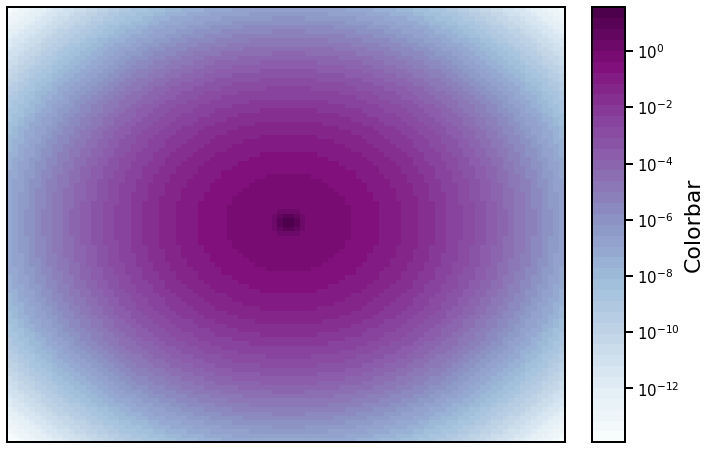

In [219]:
# Plot some data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
style(ax)
N = 100
X, Y = np.mgrid[-4:4:complex(0, N), -4:4:complex(0, N)]
Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2
# summer cmap with 15 colors
cmap = plt.get_cmap('BuPu', 40)
c = ax.pcolor(X, Y, Z,norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap)

############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax,
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-6
                   )
# add colorbar from ax
cbar = fig.colorbar(c, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('Colorbar', fontsize=22)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(2)

def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='both', length=8, width=2, direction='out')

style_cbar(axins)

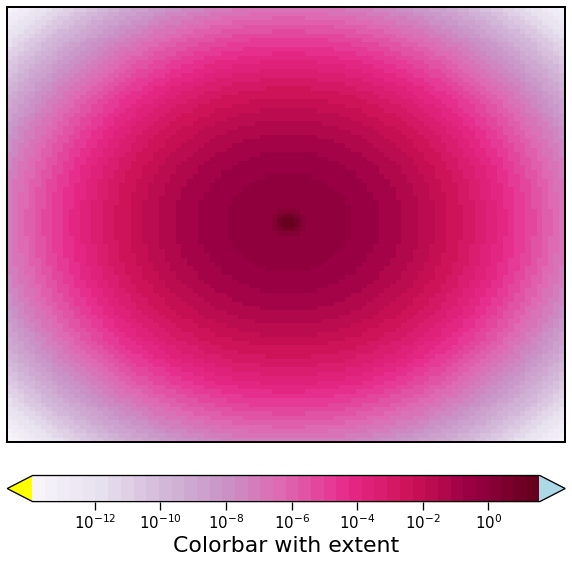

In [8]:
# Plot some data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
style(ax)
N = 100
X, Y = np.mgrid[-4:4:complex(0, N), -4:4:complex(0, N)]
Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2
# summer cmap with 15 colors
cmap = plt.get_cmap('PuRd', 40)

# change the color for the extents
cmap.set_under('yellow')
cmap.set_over('lightblue')
c = ax.pcolor(X, Y, Z,norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap=cmap)

############# COLORBAR with extend ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax,
                    width="100%",  
                    height="6%",
                    # bottom of the plot
                    loc='lower center',
                    borderpad=-6
                   )
# add colorbar from ax
cbar2 = fig.colorbar(c, cax=axins, orientation='horizontal', extend='both')
# style(axins)
cbar2.set_label('Colorbar with extent', fontsize=22)

# thickness of spines around the colorbar
cbar2.outline.set_linewidth(1.3)

def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='both', length=8, width=1.3, direction='out')

style_cbar(axins)

# Time for practice!

<img src="/Users/theodorekhadir/Documents/PHD/Teaching/fig1_grl2022.png" alt="Alternative text" />

CMIP6 evaluation of the relationship between the cloud fraction profiles and the shortwave cloud radiative effect at the TOA. 
- DJF zonal profiles of cloud fraction (%) for CALIPSO-GOCCP(2008-2015) and cloud fraction biases (%) for the CMIP6 lidar simulator outputs, and zonal means of SWCRE_TOA for CERES (2008-2015, black line) and for the CMIP outputs (red line, W/m2) in the upper part of each subplot. 
- The 0, -20 and -40˚C isotherms (dotted black lines) help locate mixed-phase temperatures. 
- The Southern-Ocean and low- and mid-levels are emphasized by horizontal black lines and the vertical black lines mark the 40°S, 70°S and 55°S where the 0°C isotherm meets the surface.  

*(from G. Cesana, T. Khadir et al., 2022, GRL)*

In [2]:
# download data on my github page
! wget https://github.com/theodorekhadir/Tutopy/blob/main/matplotlib/data_fig1_matplotlib_tuto.nc

--2022-11-07 14:19:39--  https://github.com/theodorekhadir/Tutopy/blob/main/matplotlib/data_fig1_matplotlib_tuto.nc
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data_fig1_matplotlib_tuto.nc.1’

data_fig1_matplotli     [ <=>                ] 135,33K  --.-KB/s    in 0,08s   

2022-11-07 14:19:45 (1,62 MB/s) - ‘data_fig1_matplotlib_tuto.nc.1’ saved [138573]



In [8]:
# Load the data
import xarray as xr
path_data = 'data_fig1_matplotlib_tuto.nc'
ds = xr.open_dataset(path_data)
ds

<xarray.Dataset>
Dimensions:     (data: 10, lat: 82, altitude: 40)
Coordinates:
  * data        (data) object 'Observations' 'BCC-CSM2-MR' ... 'MRI-ESM2-0'
  * lat         (lat) float64 -81.0 -79.0 -77.0 -75.0 ... 75.0 77.0 79.0 81.0
  * altitude    (altitude) float64 0.24 0.72 1.2 1.68 ... 17.52 18.0 18.48 18.96
Data variables:
    mean_cresw  (data, lat) float64 ...
    mean_cftot  (data, lat, altitude) float64 ...
    mean_temp   (data, lat, altitude) float64 ...

## 1. Let's define the grid

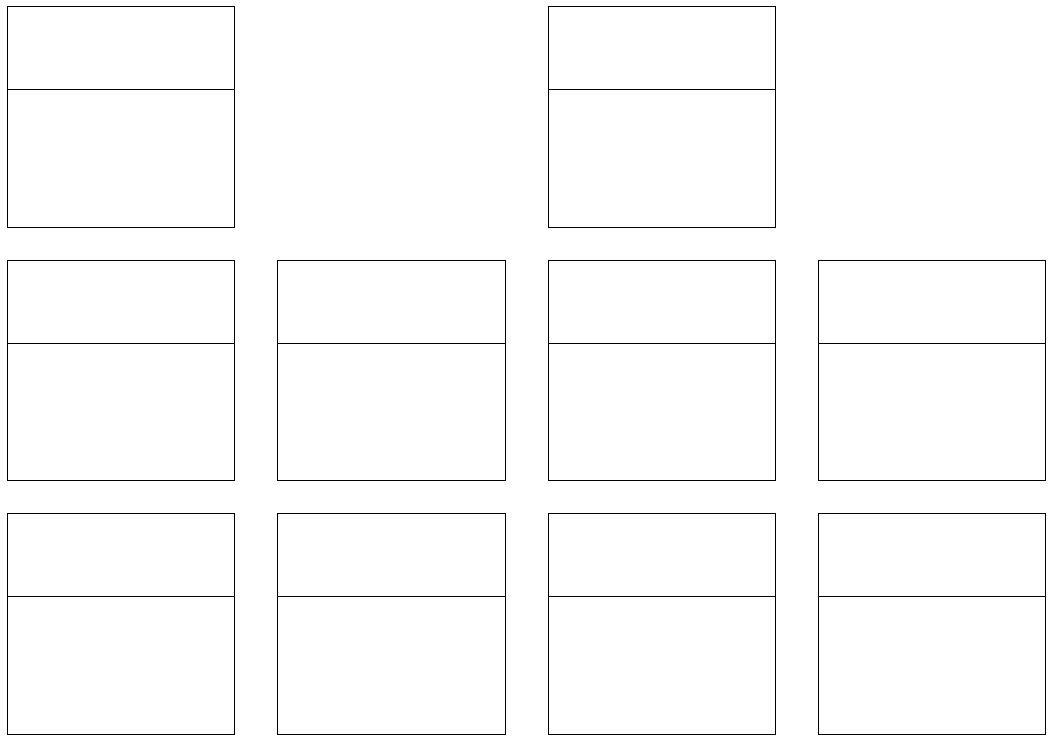

In [24]:
fig = plt.figure(num=None, figsize=(15.5, 11.35))

# define the 3 rows of subplots
gs_top = gridspec.GridSpec(ncols=4, nrows=8, hspace = 0.0, wspace = 0.19, 
                           top = 0.98, bottom = 0.71, left = 0.05, right = 0.98)
gs_center = gridspec.GridSpec(ncols=4, nrows=8, hspace = 0.0, wspace = 0.19, 
                           top = 0.67, bottom = 0.40, left = 0.05, right = 0.98)
gs_bottom = gridspec.GridSpec(ncols=4, nrows=8, hspace = 0.0, wspace = 0.19, 
                           top = 0.36, bottom = 0.090, left = 0.05, right = 0.98)

list_gs = [gs_top, gs_center, gs_bottom]

fig.add_subplot(gs_top[0:3,0])

def plot_mod(col, row, list_gs):
    '''
    Takes the subplot column and row number and make a plot for the SW CRE on the top and the CF bias on the bottom
    '''
    gs = list_gs[row]
    ax_sw = fig.add_subplot(gs[0:3,col])
    ax_cf = fig.add_subplot(gs[3:8,col])
    hide_ticks(ax_sw)
    hide_ticks(ax_cf)
    return ax_sw, ax_cf
    
list_axes = []
for count in range(4*3):
    row = count // 4
    col = count % 4
    if count in [1, 3]:
        list_axes.append(['', ''])
    else:
        ax_sw, ax_cf = plot_mod(col, row, list_gs)
        list_axes.append([ax_sw, ax_cf])


## 2. Let's define the plotting functions

## 3. Put everything together

# cartopy
- Create maps
- Different projections
- Plot trajectories, dots and 2D data
- Masks for significance
- Grid definition and customization